In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer




In [23]:
df = pd.read_csv("Data/data1.csv")
print(df.head())
print(df.columns)

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

Dataset Shape: (4920, 18)
Unique Diseases: 41
 Sample Records:
             Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN 

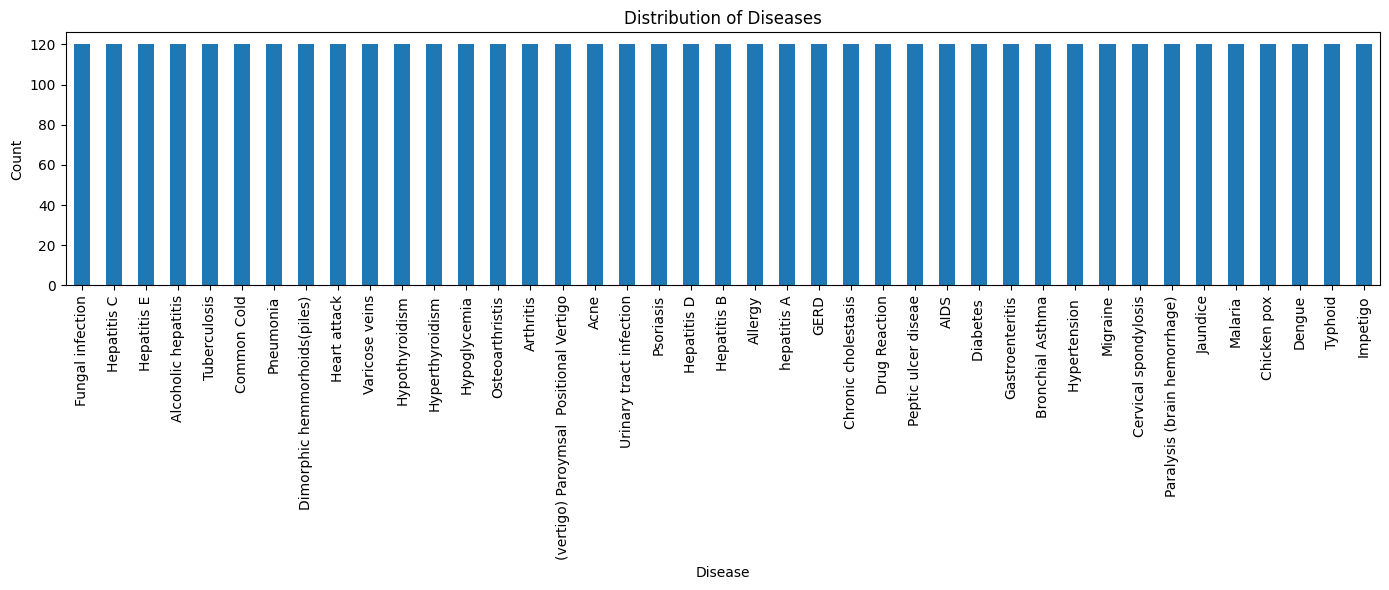

In [24]:
#Display basic info
print("Dataset Shape:", df.shape)
print("Unique Diseases:", df['Disease'].nunique())
print(" Sample Records:\n", df.head())

# Plot disease distribution
plt.figure(figsize=(14, 6))
df['Disease'].value_counts().plot(kind='bar')
plt.title("Distribution of Diseases")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [25]:
# Analyze symptom frequency (NO concatenation)
symptom_cols = [col for col in df.columns if col.startswith("Symptom")]
symptoms_flat = df[symptom_cols].values.flatten()
symptoms_cleaned = [s.strip().lower() for s in symptoms_flat if isinstance(s, str)]


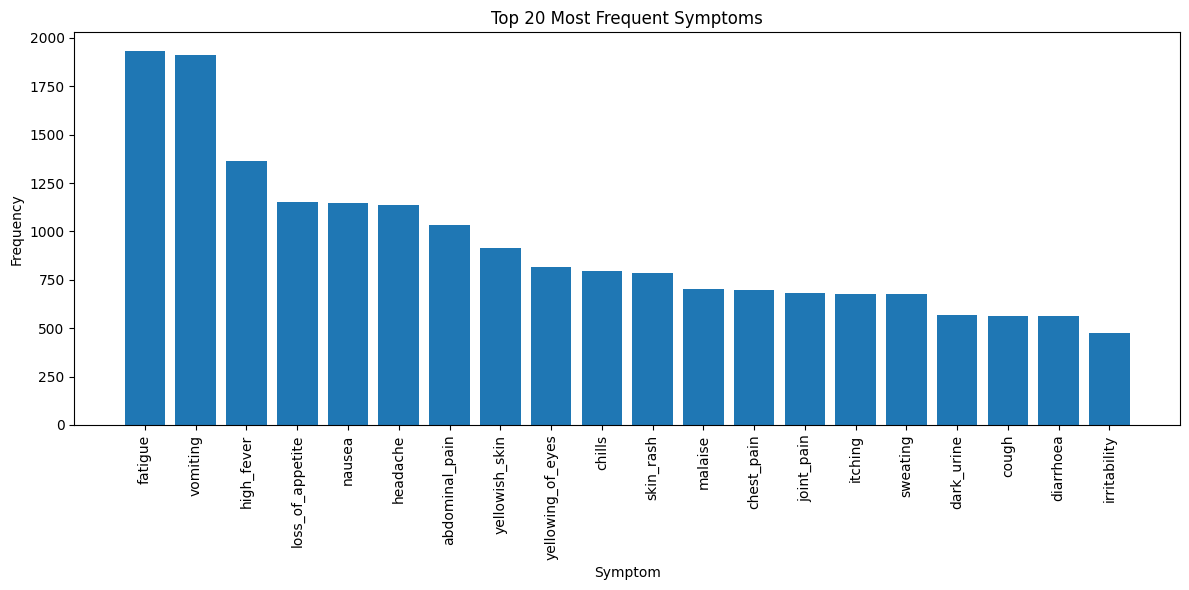

In [26]:
symptom_cols = [col for col in df.columns if col.startswith("Symptom")]

# Flatten the symptom values into a single list
symptoms_flat = df[symptom_cols].values.flatten()
symptoms_cleaned = [s.strip().lower() for s in symptoms_flat if isinstance(s, str)]

# Count the symptoms
symptom_counter = Counter(symptoms_cleaned)

# Plot top 20 symptoms
top_symptoms = dict(symptom_counter.most_common(20))
plt.figure(figsize=(12, 6))
plt.bar(top_symptoms.keys(), top_symptoms.values())
plt.title("Top 20 Most Frequent Symptoms")
plt.xlabel("Symptom")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode diseases numerically for modeling
le = LabelEncoder()
df['Disease_encoded'] = le.fit_transform(df['Disease'])

# Print disease-to-label mapping
disease_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(" Disease Label Mapping:\n", disease_mapping)


 Disease Label Mapping:
 {'(vertigo) Paroymsal  Positional Vertigo': np.int64(0), 'AIDS': np.int64(1), 'Acne': np.int64(2), 'Alcoholic hepatitis': np.int64(3), 'Allergy': np.int64(4), 'Arthritis': np.int64(5), 'Bronchial Asthma': np.int64(6), 'Cervical spondylosis': np.int64(7), 'Chicken pox': np.int64(8), 'Chronic cholestasis': np.int64(9), 'Common Cold': np.int64(10), 'Dengue': np.int64(11), 'Diabetes ': np.int64(12), 'Dimorphic hemmorhoids(piles)': np.int64(13), 'Drug Reaction': np.int64(14), 'Fungal infection': np.int64(15), 'GERD': np.int64(16), 'Gastroenteritis': np.int64(17), 'Heart attack': np.int64(18), 'Hepatitis B': np.int64(19), 'Hepatitis C': np.int64(20), 'Hepatitis D': np.int64(21), 'Hepatitis E': np.int64(22), 'Hypertension ': np.int64(23), 'Hyperthyroidism': np.int64(24), 'Hypoglycemia': np.int64(25), 'Hypothyroidism': np.int64(26), 'Impetigo': np.int64(27), 'Jaundice': np.int64(28), 'Malaria': np.int64(29), 'Migraine': np.int64(30), 'Osteoarthristis': np.int64(31), 'P

 Sample count per disease:
Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B              

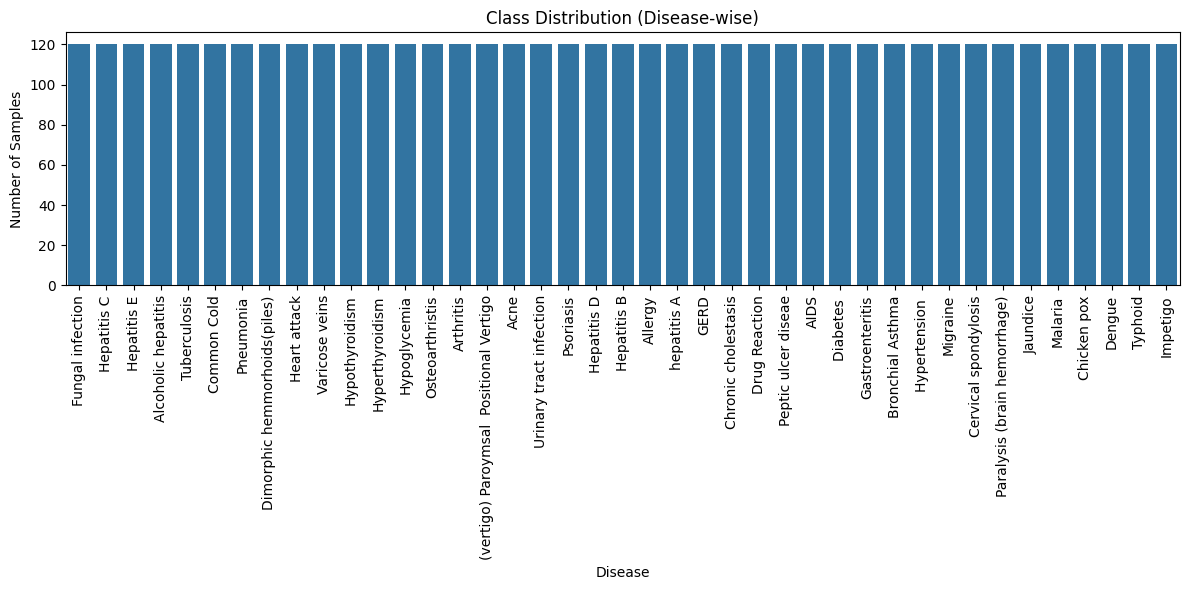

⚖️ Class Imbalance Ratio (Max/Min): 1.00


In [28]:
# Count samples per class
class_counts = df['Disease'].value_counts()

# Display counts
print(" Sample count per disease:")
print(class_counts)

# Plot class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution (Disease-wise)")
plt.xlabel("Disease")
plt.ylabel("Number of Samples")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

max_class = class_counts.max()
min_class = class_counts.min()
imbalance_ratio = max_class / min_class
print(f"⚖️ Class Imbalance Ratio (Max/Min): {imbalance_ratio:.2f}")



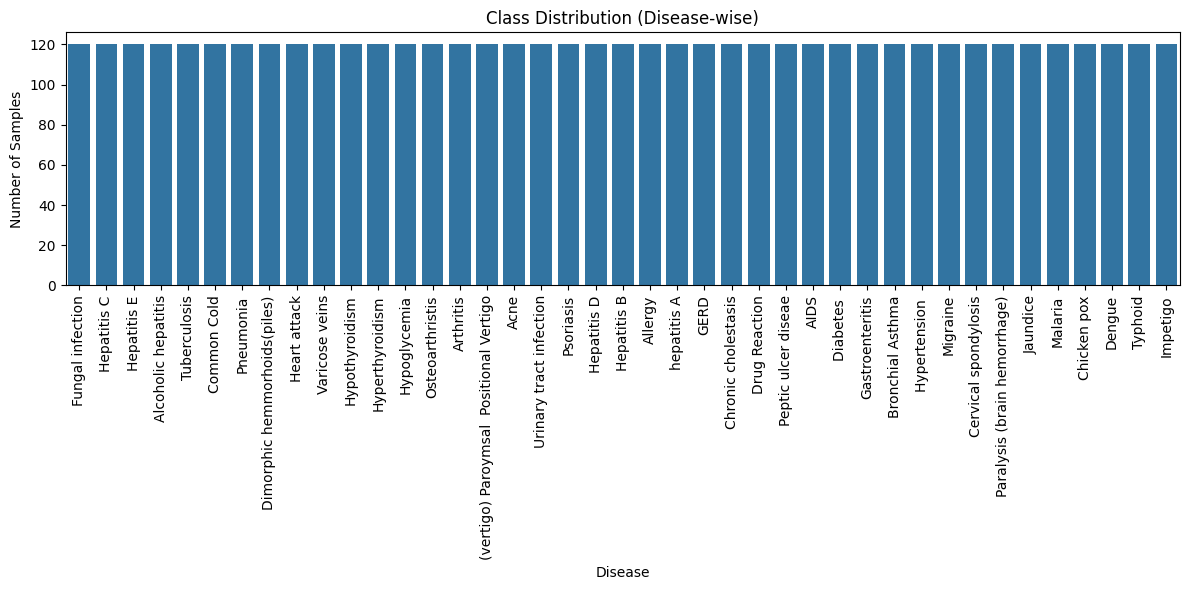

Class counts:
 Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                          

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df['Disease'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution (Disease-wise)")
plt.xlabel("Disease")
plt.ylabel("Number of Samples")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Class counts:\n", class_counts)


In [30]:
# from sklearn.ensemble import GradientBoostingClassifier
# clf = GradientBoostingClassifier()


In [31]:
df = df.drop_duplicates()
print("After dropping duplicates:", df.shape)

# Symptom processing
symptom_cols = [col for col in df.columns if col.startswith("Symptom")]
df['All_Symptoms'] = df[symptom_cols].apply(lambda row: ' '.join(row.dropna().astype(str)).lower(), axis=1)
df['Symptom_Count'] = df[symptom_cols].notna().sum(axis=1)



After dropping duplicates: (304, 19)


In [32]:
# TF-IDF transformation
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['All_Symptoms'])  # <- replace with your actual column if named differently


In [33]:
from scipy.sparse import csr_matrix, hstack

# Combine TF-IDF + Symptom_Count
symptom_count_sparse = csr_matrix(df[['Symptom_Count']].values)
X = hstack([X_tfidf, symptom_count_sparse])

# Encode target
y = df['Disease']
le = LabelEncoder()
y_encoded = le.fit_transform(y)



In [34]:
from sklearn.model_selection import train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)



/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [35]:
# Evaluation
y_pred = model.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


 Accuracy: 0.9672131147540983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         0
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00        

/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

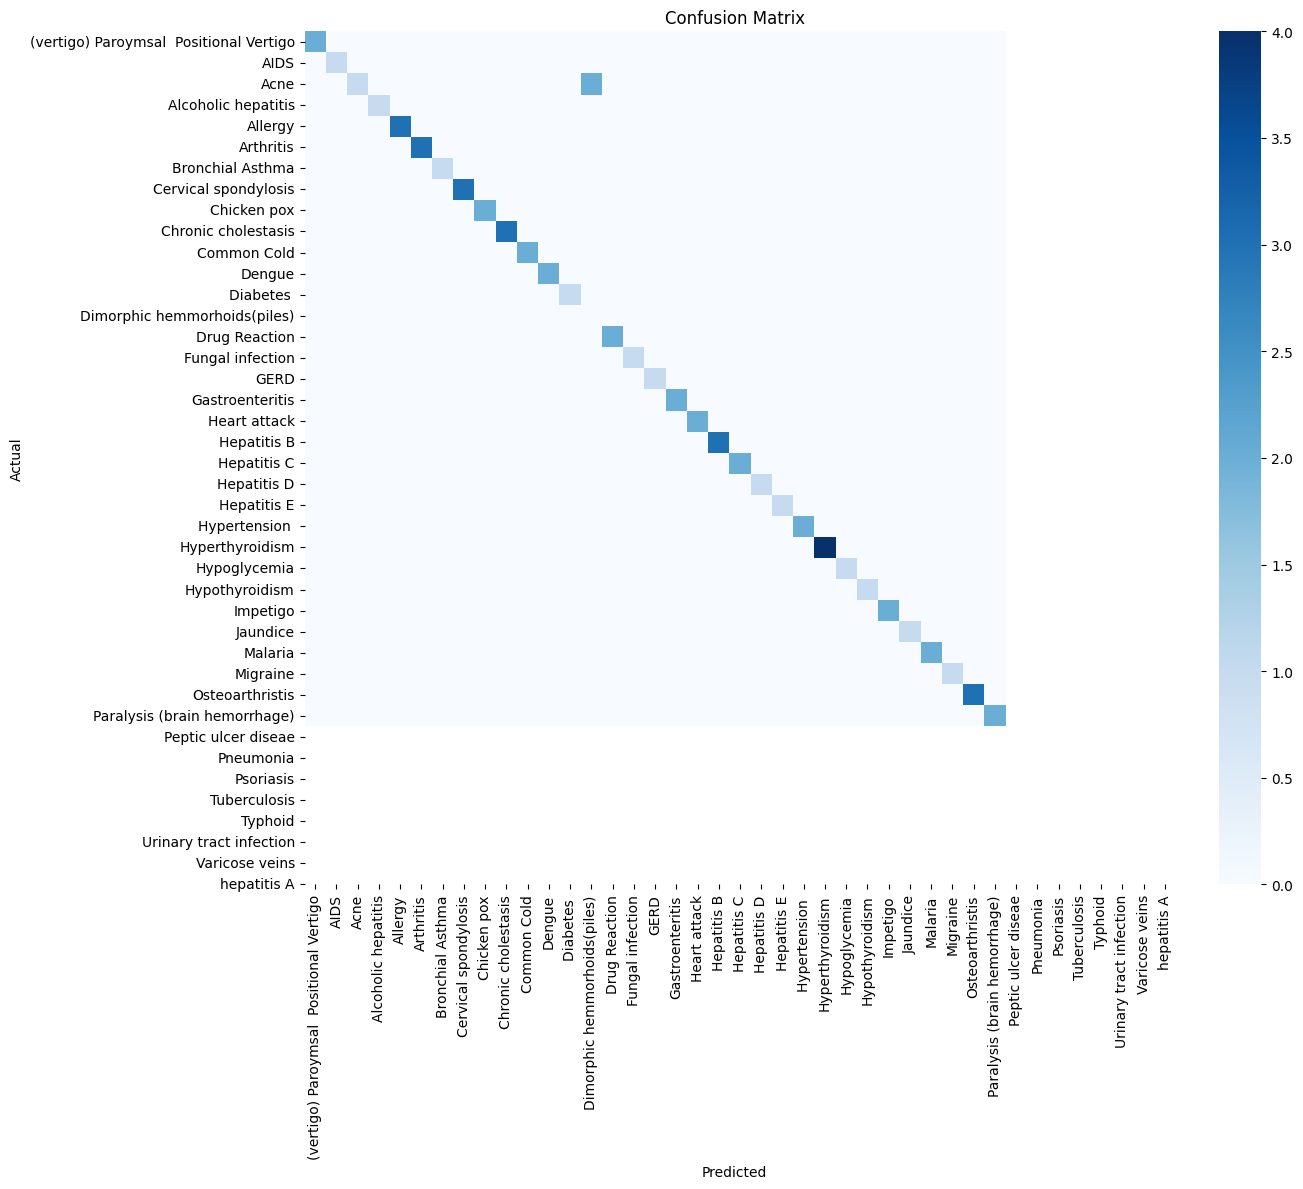

In [36]:

# Confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [37]:
from sklearn.preprocessing import label_binarize
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))
n_classes = y_test_bin.shape[1]

#  Get predicted probabilities from existing model
y_score = model.predict_proba(X_test)


/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_

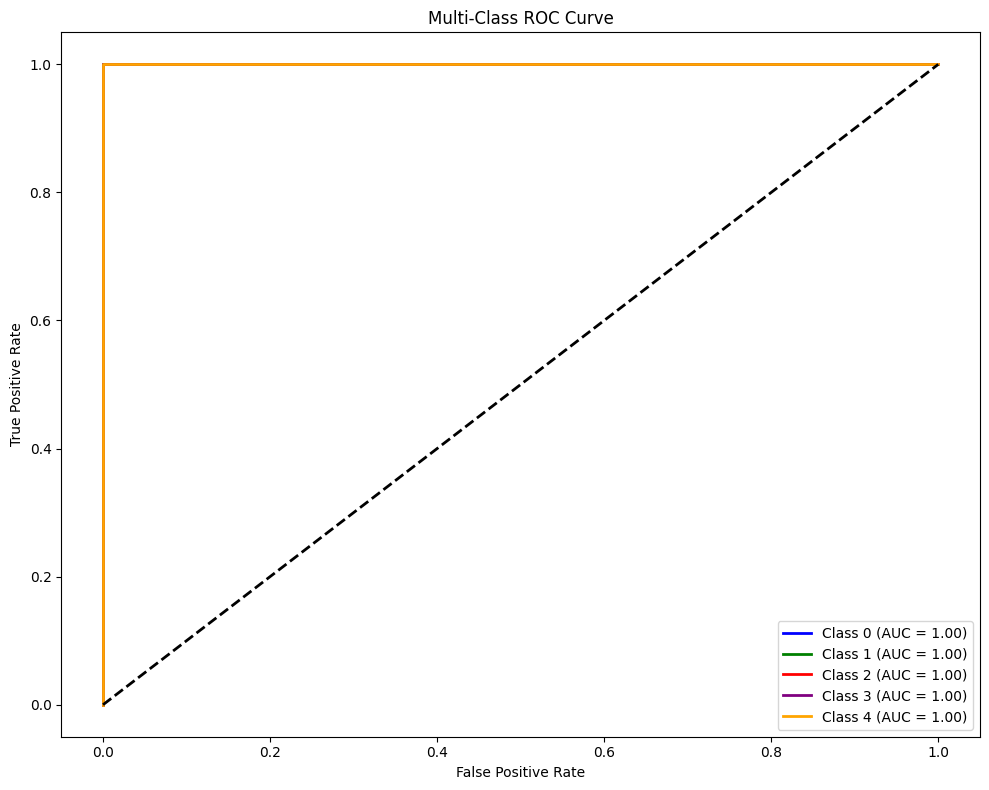

In [38]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot for first 5 classes (to keep it readable)
colors = cycle(['blue', 'green', 'red', 'purple', 'orange'])

plt.figure(figsize=(10, 8))
for i, color in zip(range(min(n_classes, 5)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thre

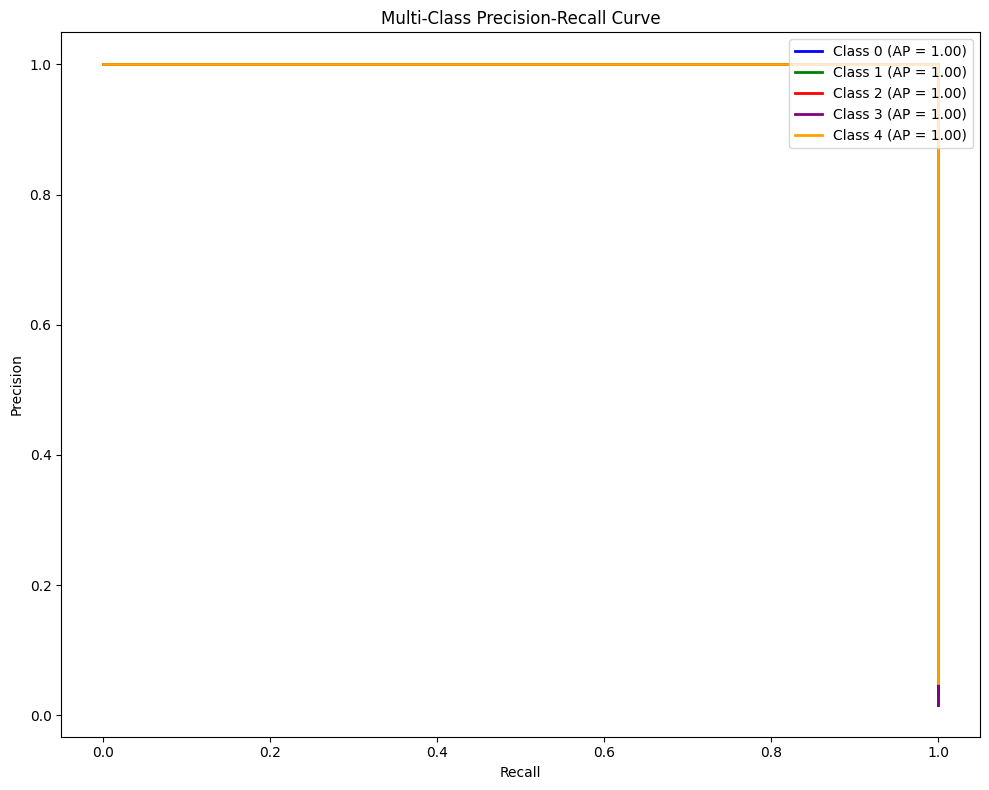

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall for each class
precision, recall, avg_precision = {}, {}, {}
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Plot for first 5 classes
plt.figure(figsize=(10, 8))
for i, color in zip(range(min(n_classes, 5)), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Class {i} (AP = {avg_precision[i]:.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Multi-Class Precision-Recall Curve")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         0
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00    

/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())


/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/rajasribhagam/Library/Python/3.9/lib/python/site-packages/sklea

Cross-validated accuracy: 1.0


In [42]:
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score



print("Top-3 Accuracy:", top_k_accuracy_score(
    y_test,
    model.predict_proba(X_test),
    k=3,
    labels=np.unique(y_encoded)  
))

loss = log_loss(y_test, model.predict_proba(X_test), labels=np.unique(y_encoded))
print(f"Log Loss: {loss:.4f}")

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")



Top-3 Accuracy: 1.0
Log Loss: 0.9349
Cohen's Kappa Score: 0.9660
